In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [124]:
heart_data = pd.read_csv('heart.csv')

In [125]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [127]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [128]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [129]:
heart_data.shape

(303, 14)

In [130]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [131]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# 0 --> Healthy heart 
# 1 --> Defective heart

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

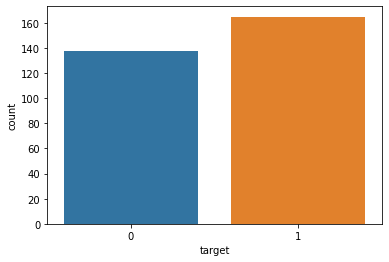

In [132]:
sns.countplot(heart_data['target'])

# 0--> Female
# 1--> Male

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

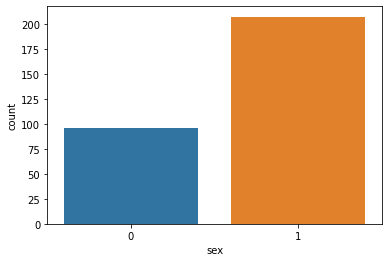

In [133]:
sns.countplot(heart_data['sex'])

# splitting the features and target

In [134]:
X = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [135]:
X.shape

(303, 13)

In [136]:
y.shape

(303,)

In [137]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [138]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Train and test data

In [139]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [140]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(242, 13) (61, 13) (242,) (61,)


# MODEL TRAINING

# Logistic Regression

In [141]:
model = LogisticRegression(max_iter=1000)

In [142]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

In [143]:
train_predictions = model.predict(X_train)

In [144]:
train_data_accuracy = accuracy_score(y_train,train_predictions)

In [145]:
print("Accuracy on training data",train_data_accuracy)

Accuracy on training data 0.8471074380165289


In [146]:
test_predictions = model.predict(X_test)

In [147]:
test_data_accuracy = accuracy_score(y_test,test_predictions)

In [148]:
print("Accuracy on testing data",test_data_accuracy)

Accuracy on testing data 0.8032786885245902


# Building a Predictive System

In [149]:
input_data = (44,1,1,120,263,0,1,173,0,0,2,0,3)

# change input data to a numpy array

input_data_as_np = np.asarray(input_data)

# reshape the numpy array as we are predicting for just one instance or example so our model will understand that

input_data_reshaped = input_data_as_np.reshape(1,-1)

predicted_value = model.predict(input_data_reshaped)
print(predicted_value)

if(predicted_value[0]==0):
    print("The person has a healthy heart")
else:
    print("The person has a defective heart")

[1]
The person has a defective heart
